In [165]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split as tts

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Preprocessing 

**DataSet Summary**

Load The Data



In [166]:
train_path="../input/titanic/train.csv"
test_path="../input/titanic/test.csv"
submission_path="../input/titanic/gender_submission.csv"
#import train data 
train_data = pd.read_csv(train_path)
#import test data 
test_data = pd.read_csv(test_path)
#import submission data 
submission_data = pd.read_csv(submission_path)

In [103]:
#show the first 10 rows of the train DataSet
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [104]:
#show the last 10 rows of the train  DataSet
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [105]:
#show the last 10 rows of the test  DataSet
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [106]:
#show the objective of the poroject
submission_data.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [107]:
# get some information about the training DataSet
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
# describe the DataSet
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Data Cleaning**

Detect Missing Values

In [110]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Replace All NaN Values with Median/mode

In [167]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())
# train_data.Cabin = train_data.Cabin.fillna(train_data.Cabin.mode()[0])
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode()[0])

In [113]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [114]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [168]:
test_data.Age = test_data.Age.fillna(test_data.Age.median())
# test_data.Cabin = test_data.Cabin.fillna(test_data.Cabin.mode()[0])
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [116]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [117]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [169]:
def detect_outliers(data,column,q1=.25,q3=.75):
    quantile1 = data[column].quantile(q1)
    quantile3 = data[column].quantile(q3)
    IQR =  quantile3 - quantile1
    up_limit = quantile3 + (IQR*1.5)
    low_limit = quantile1 - (IQR*1.5)
    
    return up_limit, low_limit
    
def repplace_outlier(data,column):
    up_limit, low_limit = detect_outliers(data,column)
    print(up_limit)
    data.loc[(data[column] > up_limit),column] = up_limit
    data.loc[(data[column] < low_limit),column] = low_limit
    
repplace_outlier(train_data,'Age')
train_data.Age = train_data.Age.astype(int)
repplace_outlier(train_data,'Fare')
train_data.Age = train_data.Age.astype(int)
repplace_outlier(test_data,'Age')
test_data.Age = test_data.Age.astype(int)
repplace_outlier(test_data,'Fare')
test_data.Age = test_data.Age.astype(int)


54.5
65.6344
54.875
66.9063


**Data Visualization**

Import package

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Count of Survival & its Rates Between Genders')

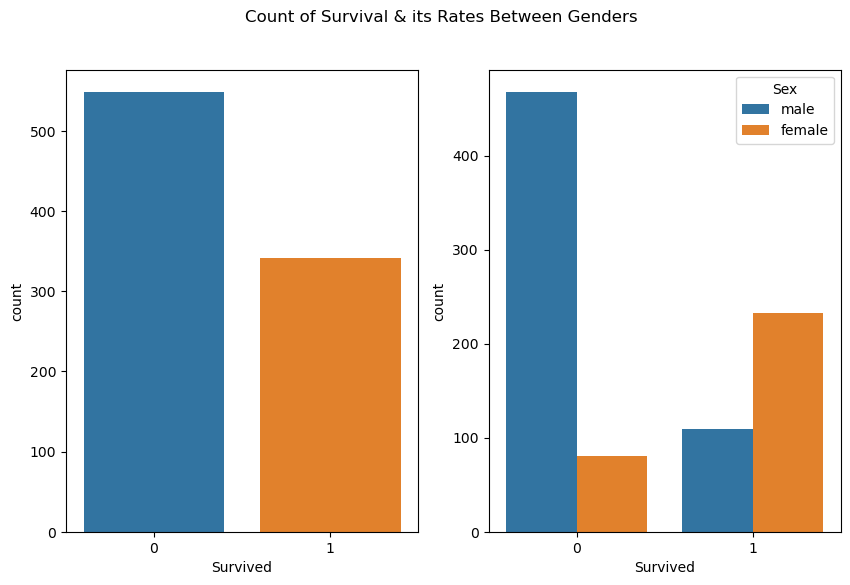

In [120]:
# count plot 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.countplot(data=train_data,x='Survived',ax=ax1)
sns.countplot(data=train_data,hue='Sex',x='Survived',ax=ax2)
fig.suptitle("Count of Survival & its Rates Between Genders")


Text(0.5, 1.0, 'Age Around Gender')

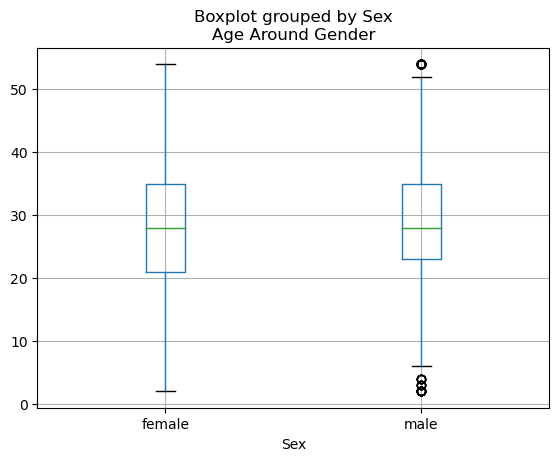

In [121]:
# Box plot
train_data.boxplot(column='Age',by='Sex')
plt.title("Age Around Gender")

Text(0.5, 1.0, 'Port of Embarkation in relation With Ticket class')

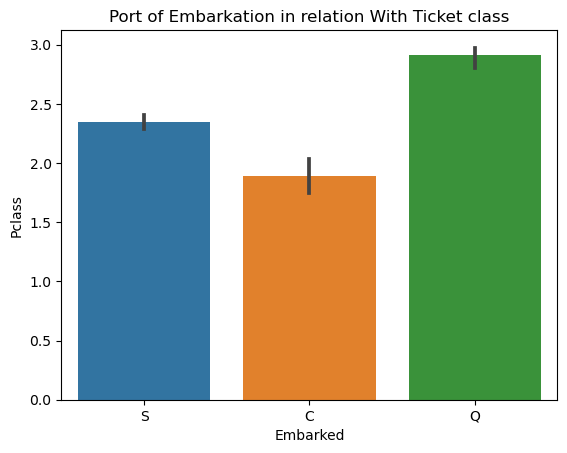

In [171]:
# Bar plot
sns.barplot(data=train_data,x='Embarked',y='Pclass')

plt.title("Port of Embarkation in relation With Ticket class")

Text(0.5, 1.0, 'Age vs Fare by Sex')

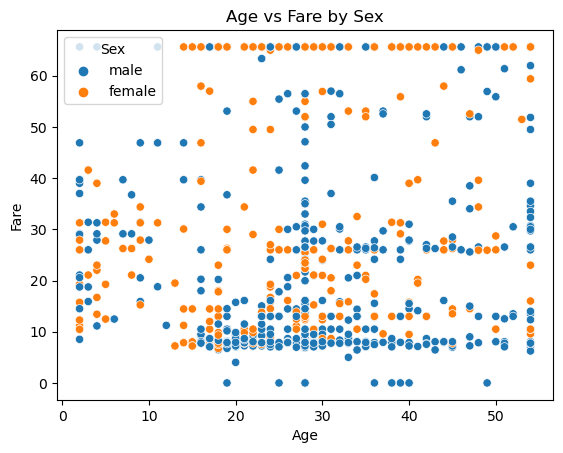

In [123]:
# scatter plot
sns.scatterplot(data=train_data,x='Age',y='Fare',hue='Sex')
plt.title("Age vs Fare by Sex")

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.060493 -0.035322  0.081629  0.317430
Pclass   -0.338481  1.000000 -0.339818  0.083081  0.018443 -0.715300
Age      -0.060493 -0.339818  1.000000 -0.240284 -0.180300  0.144119
SibSp    -0.035322  0.083081 -0.240284  1.000000  0.414838  0.332021
Parch     0.081629  0.018443 -0.180300  0.414838  1.000000  0.292616
Fare      0.317430 -0.715300  0.144119  0.332021  0.292616  1.000000


/tmp/ipykernel_32/2230281172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cof = sub_set.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

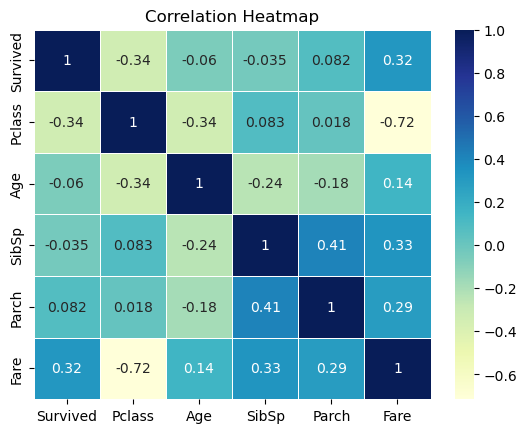

In [124]:
sub_set =  train_data.drop('PassengerId',axis=1)
corr_cof = sub_set.corr()
print(corr_cof)
# heatmaps 
sns.heatmap(data=corr_cof,annot=True,linewidths=.5,cmap='YlGnBu')
plt.title("Correlation Heatmap")


Text(0.5, 0.98, 'Density of spouses & children aboard the Titanic')

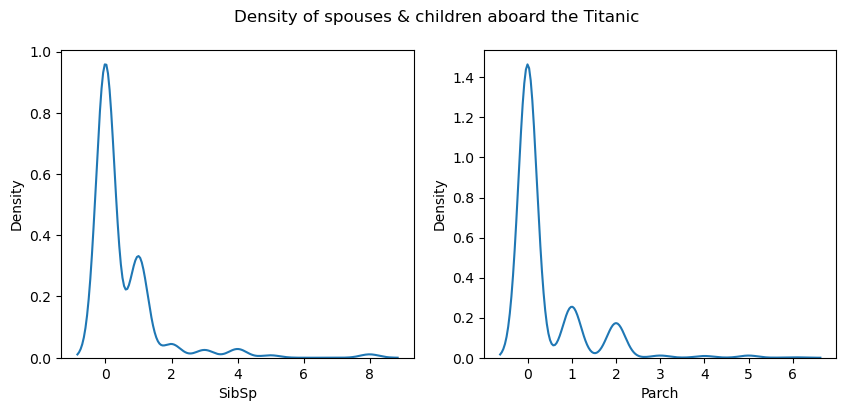

In [125]:
# Kde plot 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10, 4))
# plt.figure(figsize=(15,8))
sns.kdeplot(data=train_data,x='SibSp',ax=ax1)
sns.kdeplot(data=train_data,x='Parch',ax=ax2)

fig.suptitle("Density of spouses & children aboard the Titanic")


**Data exploration**

In [172]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [173]:
# make PassengerId column as index column
Titanic_Model_data = train_data.set_index('PassengerId')
#remove Name Column 
Titanic_Model_data = Titanic_Model_data.drop(['Name','Ticket','Cabin'],axis=1)

Titanic_Model_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,65.6344,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,S
888,1,1,female,19,0,0,30.0000,S
889,0,3,female,28,1,2,23.4500,S


In [174]:
# make PassengerId column as index column
Titanic_Model_test_data = test_data.set_index('PassengerId')
#remove Name Column 
Titanic_Model_test_data = Titanic_Model_test_data.drop(['Name','Ticket','Cabin'],axis=1)

Titanic_Model_test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34,0,0,7.8292,Q
893,3,female,47,1,0,7.0000,S
894,2,male,54,0,0,9.6875,Q
895,3,male,27,0,0,8.6625,S
896,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,27,0,0,8.0500,S
1306,1,female,39,0,0,66.9063,C
1307,3,male,38,0,0,7.2500,S


In [175]:
# change type of columns
Titanic_Model_data.Fare = Titanic_Model_data.Fare.astype(int)
Titanic_Model_data.Age = Titanic_Model_data.Age.astype(int)
Titanic_Model_data.Embarked = Titanic_Model_data.Embarked.astype(str)
# change type of columns
Titanic_Model_test_data.Fare = Titanic_Model_test_data.Fare.astype(int)
Titanic_Model_test_data.Age = Titanic_Model_test_data.Age.astype(int)
Titanic_Model_test_data.Embarked = Titanic_Model_test_data.Embarked.astype(str)

In [176]:
# encode strings to integer
Titanic_Model_data.Sex = LabelEncoder().fit_transform(Titanic_Model_data.Sex)
Titanic_Model_data.Embarked = LabelEncoder().fit_transform(Titanic_Model_data.Embarked)
# encode strings to integer
Titanic_Model_test_data.Sex = LabelEncoder().fit_transform(Titanic_Model_test_data.Sex)
Titanic_Model_test_data.Embarked = LabelEncoder().fit_transform(Titanic_Model_test_data.Embarked)


In [179]:
# split data into train data & test data
X_train,X_test,y_train,y_test=tts(Titanic_Model_data.iloc[:,1:],Titanic_Model_data.iloc[:,0],test_size=.3,shuffle=True)

In [135]:
# X_train = Titanic_Model_data.iloc[:,1:]
# y_train = Titanic_Model_data.iloc[:,0]
# X_test = Titanic_Model_test_data
# y_test = Titanic_Model_data.iloc[:,0]

In [137]:
#scaling training data & testing data
# scaler = MinMaxScaler()
# robuster = RobustScaler()
# X_train = robuster.fit_transform(X_train)
# X_test = robuster.fit_transform(X_test)

In [138]:
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (623, 7)
y_train shape :  (623,)
X_test shape :  (268, 7)
y_test shape :  (268,)


# Building and Training the Model

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [156]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4, criterion='gini', max_features=0.6, splitter='best')
# Train Decision Tree Classifer
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.6)

**Evaluate the Model**

In [157]:
print('Accuracy of Decision Tree classifer on train set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifer on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifer on train set: 0.84
Accuracy of Decision Tree classifer on test set: 0.80


**Plot the decision surface of decision trees**

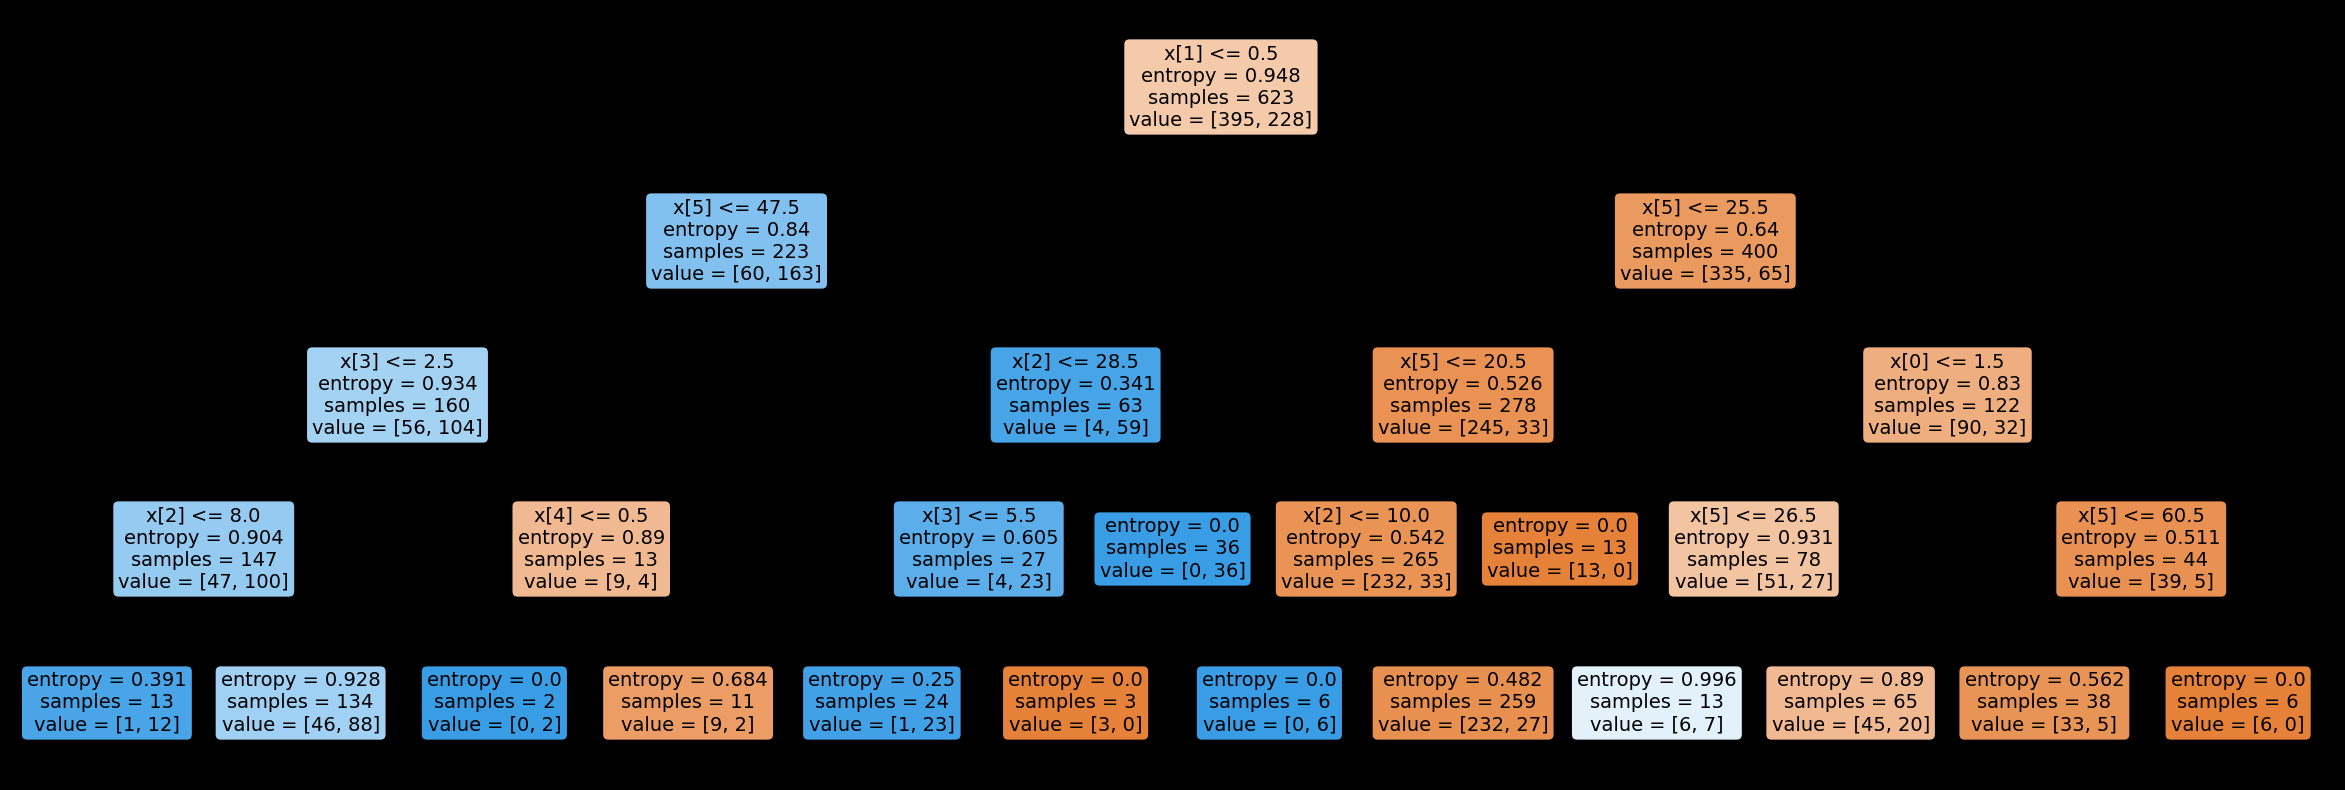

In [142]:
plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(clf,rounded = True,filled = True,fontsize=14)
plt.show()

# Making Predictions From Our Model


In [162]:
y_pred = clf.predict(Titanic_Model_test_data)
df = pd.DataFrame({'PassengerId': Titanic_Model_test_data.index, 'Survived': y_pred})
df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [164]:
df.to_csv("submission__.csv",index=False)

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



<Axes: >

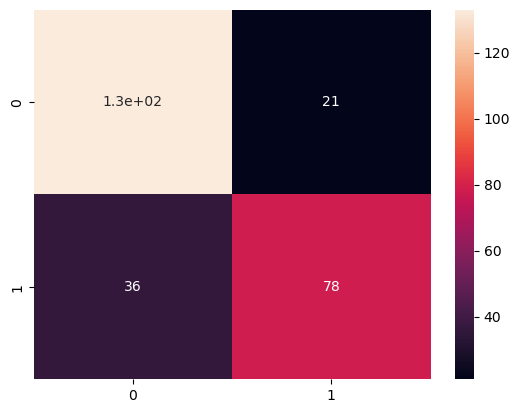

In [146]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,annot=True)